<a href="https://colab.research.google.com/github/SamanvithaBolem/SamanvithaBolem/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
file = pd.read_csv('/content/Property_Price_Train.csv')

In [3]:
file.shape

(1459, 81)

In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   object 
 3   Lot_Extent                 1200 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  91 non-null     object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1459 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

Build a Base Model

In [5]:
category_columns = file.columns[file.dtypes=='object']

numeric_columns = file.columns[file.dtypes!='object']

In [6]:
category_data = file[category_columns] #build data

In [7]:
category_data.head()

,Zoning_Class,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinType2,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,Kitchen_Quality,Functional_Rate,Fireplace_Quality,Garage,Garage_Finish_Year,Garage_Quality,Garage_Condition,Pavedd_Drive,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Sale_Type,Sale_Condition
0,RLD,Paved,NaN,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,Gable,SS,VinylSd,VinylSd,BrkFace,Gd,TA,PC,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,TF,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RLD,Paved,NaN,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,Gable,SS,MetalSd,MetalSd,None,TA,TA,CB,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,TF,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RLD,Paved,NaN,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,Gable,SS,VinylSd,VinylSd,BrkFace,Gd,TA,PC,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,TF,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RLD,Paved,NaN,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,Gable,SS,Wd Sdng,Wd Shng,None,TA,TA,BT,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,TF,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RLD,Paved,NaN,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,Gable,SS,VinylSd,VinylSd,BrkFace,Gd,TA,PC,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,TF,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [8]:
numeric_data = file[numeric_columns]

In [9]:
numeric_data.head()

,Id,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Price
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,1085.793744,163.788080,69.596115,20.337934,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,196.316304,198.900074,74.716033,15.039392,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,218.068403,26.127533,32.085268,-46.232198,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,696.996439,46.948018,40.181415,60.921821,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,568.859882,-10.626105,20.755323,21.788818,0,0,0,0,12,2008,250000


In [10]:
data = numeric_data

In [11]:
data.shape

(1459, 38)

In [12]:
data=data.drop("Id",axis=1)

In [13]:
data.shape

(1459, 37)

In [18]:
data.columns

Index(['Building_Class', 'Lot_Extent', 'Lot_Size', 'Overall_Material',
       'House_Condition', 'Construction_Year', 'Remodel_Year',
       'Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'First_Floor_Area', 'Second_Floor_Area',
       'LowQualFinSF', 'Grade_Living_Area', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade',
       'Half_Bathroom_Above_Grade', 'Bedroom_Above_Grade',
       'Kitchen_Above_Grade', 'Rooms_Above_Grade', 'Fireplaces',
       'Garage_Built_Year', 'Garage_Size', 'Garage_Area', 'W_Deck_Area',
       'Open_Lobby_Area', 'Enclosed_Lobby_Area', 'Three_Season_Lobby_Area',
       'Screen_Lobby_Area', 'Pool_Area', 'Miscellaneous_Value', 'Month_Sold',
       'Year_Sold', 'Sale_Price'],
      dtype='object')

In [14]:
data.isna().sum().sort_values(ascending=False)

Lot_Extent                   259
Garage_Built_Year             81
Brick_Veneer_Area              8
Sale_Price                     0
BsmtUnfSF                      0
Grade_Living_Area              0
LowQualFinSF                   0
Second_Floor_Area              0
First_Floor_Area               0
Total_Basement_Area            0
BsmtFinSF1                     0
BsmtFinSF2                     0
Underground_Half_Bathroom      0
Remodel_Year                   0
Construction_Year              0
House_Condition                0
Overall_Material               0
Lot_Size                       0
Underground_Full_Bathroom      0
Full_Bathroom_Above_Grade      0
Year_Sold                      0
Open_Lobby_Area                0
Month_Sold                     0
Miscellaneous_Value            0
Pool_Area                      0
Screen_Lobby_Area              0
Three_Season_Lobby_Area        0
Enclosed_Lobby_Area            0
W_Deck_Area                    0
Half_Bathroom_Above_Grade      0
Garage_Are

In [15]:
data['Lot_Extent'].fillna(data['Lot_Extent'].median(),inplace=True)

data['Garage_Built_Year'].fillna(data['Garage_Built_Year'].median(),inplace=True)

data['Brick_Veneer_Area'].fillna(data['Brick_Veneer_Area'].median(),inplace=True)

In [16]:
data.isna().sum().sort_values(ascending=False)

Sale_Price                   0
Underground_Half_Bathroom    0
Grade_Living_Area            0
LowQualFinSF                 0
Second_Floor_Area            0
First_Floor_Area             0
Total_Basement_Area          0
BsmtUnfSF                    0
BsmtFinSF2                   0
BsmtFinSF1                   0
Brick_Veneer_Area            0
Remodel_Year                 0
Construction_Year            0
House_Condition              0
Overall_Material             0
Lot_Size                     0
Lot_Extent                   0
Underground_Full_Bathroom    0
Full_Bathroom_Above_Grade    0
Year_Sold                    0
Half_Bathroom_Above_Grade    0
Month_Sold                   0
Miscellaneous_Value          0
Pool_Area                    0
Screen_Lobby_Area            0
Three_Season_Lobby_Area      0
Enclosed_Lobby_Area          0
Open_Lobby_Area              0
W_Deck_Area                  0
Garage_Area                  0
Garage_Size                  0
Garage_Built_Year            0
Fireplac

In [17]:
data.head()

,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Price
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,1085.793744,163.788080,69.596115,20.337934,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,196.316304,198.900074,74.716033,15.039392,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,218.068403,26.127533,32.085268,-46.232198,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,696.996439,46.948018,40.181415,60.921821,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,568.859882,-10.626105,20.755323,21.788818,0,0,0,0,12,2008,250000


In [19]:
X = data.loc[:,['Building_Class', 'Lot_Extent', 'Lot_Size', 'Overall_Material',
       'House_Condition', 'Construction_Year', 'Remodel_Year',
       'Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'First_Floor_Area', 'Second_Floor_Area',
       'LowQualFinSF', 'Grade_Living_Area', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade',
       'Half_Bathroom_Above_Grade', 'Bedroom_Above_Grade',
       'Kitchen_Above_Grade', 'Rooms_Above_Grade', 'Fireplaces',
       'Garage_Built_Year', 'Garage_Size', 'Garage_Area', 'W_Deck_Area',
       'Open_Lobby_Area', 'Enclosed_Lobby_Area', 'Three_Season_Lobby_Area',
       'Screen_Lobby_Area', 'Pool_Area', 'Miscellaneous_Value', 'Month_Sold',
       'Year_Sold']]

y= data.loc[:,'Sale_Price']

In [20]:
X = data.iloc[:,:-1]

y = data.iloc[:,-1]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,
                                             y,
                                             train_size=0.75,
                                             test_size=0.25)

In [23]:
print('Xtrain size is=',Xtrain.shape)
print('Xtest size is=',Xtest.shape)
print('ytrain size is=',ytrain.shape)
print('ytest size is=',ytest.shape)

Xtrain size is= (1094, 36)
Xtest size is= (365, 36)
ytrain size is= (1094,)
ytest size is= (365,)


In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression().fit(X,y)

In [27]:
model.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
model.intercept_

304951.2178206349

In [28]:
model.coef_

array([-1.88420601e+02, -4.29232054e+01,  2.88147427e-01,  1.69815771e+04,
        4.50036260e+03,  2.75957338e+02,  1.57861812e+02,  2.95123122e+01,
        6.04161239e+00,  2.77342107e+00, -9.01989089e-01,  7.91304438e+00,
        2.07232417e+01,  1.73944973e+01, -1.22804491e+01,  2.58372899e+01,
        1.09047232e+04, -1.22794032e+03,  5.39339383e+03, -9.49554522e+02,
       -9.09474512e+03, -1.65954782e+04,  5.89659534e+03,  5.53123857e+03,
        7.37829821e+01,  1.09110526e+04, -9.34049215e-02, -4.95507482e+00,
       -1.47120444e+00,  1.05643059e+01, -2.88180747e+01,  4.20855084e+01,
       -6.46742703e+01, -4.72619706e-01, -5.54848130e+00, -6.05880627e+02])

In [29]:
data.columns


Index(['Building_Class', 'Lot_Extent', 'Lot_Size', 'Overall_Material',
       'House_Condition', 'Construction_Year', 'Remodel_Year',
       'Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'First_Floor_Area', 'Second_Floor_Area',
       'LowQualFinSF', 'Grade_Living_Area', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade',
       'Half_Bathroom_Above_Grade', 'Bedroom_Above_Grade',
       'Kitchen_Above_Grade', 'Rooms_Above_Grade', 'Fireplaces',
       'Garage_Built_Year', 'Garage_Size', 'Garage_Area', 'W_Deck_Area',
       'Open_Lobby_Area', 'Enclosed_Lobby_Area', 'Three_Season_Lobby_Area',
       'Screen_Lobby_Area', 'Pool_Area', 'Miscellaneous_Value', 'Month_Sold',
       'Year_Sold', 'Sale_Price'],
      dtype='object')

In [30]:
ypred = model.predict(Xtest)

In [31]:
ypred

array([186263.24646641, 184335.20636334, 242720.5896214 , 268064.69375282,
       118372.12425269,  65096.90636365, 212040.29521083,  92713.40460817,
       192610.46202663, 175375.77837725, 154369.92073008, 285751.67631638,
       167688.69843108, 177627.72418653, 249792.48655582, 216605.96103519,
        10072.32410702, 286418.56655913, 175435.39634055,  56421.00952947,
       117960.97762239, 255649.21614096, 142147.72840887, 251914.56559963,
       114461.23110816, 274742.70728217, 399432.60102504, 151460.63378155,
        97299.35900374, 308062.85384964, 239467.5761206 , 234578.65669035,
       136137.17312195, 129438.50026042, 306549.54440295, 199049.99955656,
       222065.80872637,  88296.84206276, 191368.62279156,  80239.51618504,
       236600.52348713, 142098.42566344, 134895.95214452, 231326.22060521,
       231263.7986264 , 205684.87298841, 289744.97371791, 226266.9920232 ,
       151212.71943755, 223989.89277464, 256761.5288979 , 192448.84819033,
       153447.52789602, 1

In [32]:
ytest

891     172500
909     174000
673     257500
963     239000
1069    135000
         ...  
1019    213490
926     285000
901     153000
325      87000
323     126175
Name: Sale_Price, Length: 365, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


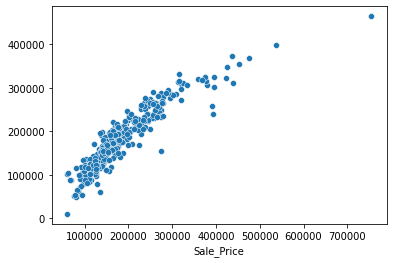

In [33]:
sns.scatterplot(ytest,ypred)

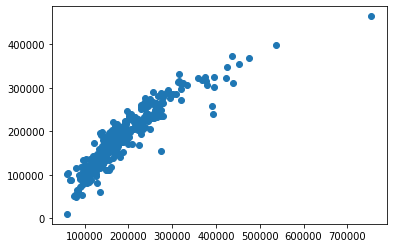

In [34]:
import matplotlib.pyplot as plt
plt.scatter(ytest,ypred)

In [35]:
Accuracy = sklearn.metrics.r2_score(ytest,ypred)
print(Accuracy)

0.8343700053291291


In [36]:
RMSE = sklearn.metrics.mean_squared_error(ytest,ypred)
print(RMSE)

1109707214.8418124


1st case 80/20 0.7961 and 1407546236.602066
 
2nd case 85/15 0.6041 and 3074413715.1899123

3rd case 75/25 0.8425 and 951485076.873502


PART_2

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [37]:
file2 = pd.read_csv('/content/Property_Price_Test.csv')

In [39]:
file2.shape

(1459, 80)

In [40]:
file2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1455 non-null   object 
 3   Lot_Extent                 1232 non-null   float64
 4   Lot_Size                   1459 non-null   float64
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  107 non-null    object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1457 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

In [41]:
category_columns = file2.columns[file2.dtypes=='object']

numeric_columns = file2.columns[file2.dtypes!='object']

In [ ]:
category_data = file2[category_columns]

In [ ]:
category_data.head()

,Zoning_Class,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinType2,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,Kitchen_Quality,Functional_Rate,Fireplace_Quality,Garage,Garage_Finish_Year,Garage_Quality,Garage_Condition,Pavedd_Drive,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Sale_Type,Sale_Condition
0,RHD,Paved,NaN,Reg,Lvl,AllPub,I,GS,NAmes,Feedr,Norm,1Fam,1Story,Gable,SS,VinylSd,VinylSd,None,TA,TA,CB,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,TF,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RLD,Paved,NaN,IR1,Lvl,AllPub,C,GS,NAmes,Norm,Norm,1Fam,1Story,Hip,SS,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CB,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,TF,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RLD,Paved,NaN,IR1,Lvl,AllPub,I,GS,Gilbert,Norm,Norm,1Fam,2Story,Gable,SS,VinylSd,VinylSd,None,TA,TA,PC,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,TF,TA,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RLD,Paved,NaN,IR1,Lvl,AllPub,I,GS,Gilbert,Norm,Norm,1Fam,2Story,Gable,SS,VinylSd,VinylSd,BrkFace,TA,TA,PC,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,TF,Gd,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RLD,Paved,NaN,IR1,HLS,AllPub,I,GS,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,SS,HdBoard,HdBoard,None,Gd,TA,PC,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,TF,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [43]:
numeric2_data = file2[numeric_columns]

In [44]:
numeric2_data.head()

,Id,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold
0,1461,20,80.0,16104.819760,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,15639.150810,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,3849.428920,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,4955.447942,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,3046.604942,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010


In [45]:
data2 = numeric2_data

In [46]:
data2.shape

(1459, 37)

In [48]:
data2 = data2.drop("Id", axis=1)

In [49]:
data2.shape

(1459, 36)

In [50]:
data2.isna().sum().sort_values(ascending=False)

Lot_Extent                   227
Garage_Built_Year             78
Brick_Veneer_Area             15
Underground_Half_Bathroom      2
Underground_Full_Bathroom      2
Garage_Area                    1
BsmtFinSF1                     1
BsmtFinSF2                     1
BsmtUnfSF                      1
Total_Basement_Area            1
Garage_Size                    1
House_Condition                0
Construction_Year              0
Remodel_Year                   0
Overall_Material               0
Grade_Living_Area              0
Lot_Size                       0
First_Floor_Area               0
Second_Floor_Area              0
LowQualFinSF                   0
Year_Sold                      0
Month_Sold                     0
Full_Bathroom_Above_Grade      0
Half_Bathroom_Above_Grade      0
Bedroom_Above_Grade            0
Kitchen_Above_Grade            0
Rooms_Above_Grade              0
Fireplaces                     0
W_Deck_Area                    0
Open_Lobby_Area                0
Enclosed_L

In [51]:
data2['Lot_Extent'].fillna(data2['Lot_Extent'].median(),inplace=True)

data2['Garage_Built_Year'].fillna(data2['Garage_Built_Year'].median(),inplace=True)

data2['Brick_Veneer_Area'].fillna(data2['Brick_Veneer_Area'].median(),inplace=True)

data2['Underground_Half_Bathroom'].fillna(data2['Underground_Half_Bathroom'].median(),inplace=True)

data2['Underground_Full_Bathroom'].fillna(data2['Underground_Full_Bathroom'].median(),inplace=True)

data2['Garage_Area'].fillna(data2['Garage_Area'].median(),inplace=True)

data2['BsmtFinSF1'].fillna(data2['BsmtFinSF1'].median(),inplace=True)

data2['BsmtFinSF2'].fillna(data2['BsmtFinSF2'].median(),inplace=True)

data2['BsmtUnfSF'].fillna(data2['BsmtUnfSF'].median(),inplace=True)

data2['Total_Basement_Area'].fillna(data2['Total_Basement_Area'].median(),inplace=True)

data2['Garage_Size'].fillna(data2['Garage_Size'].median(),inplace=True)

In [52]:
data2.isna().sum().sort_values(ascending=False)

Year_Sold                    0
Month_Sold                   0
Grade_Living_Area            0
LowQualFinSF                 0
Second_Floor_Area            0
First_Floor_Area             0
Total_Basement_Area          0
BsmtUnfSF                    0
BsmtFinSF2                   0
BsmtFinSF1                   0
Brick_Veneer_Area            0
Remodel_Year                 0
Construction_Year            0
House_Condition              0
Overall_Material             0
Lot_Size                     0
Lot_Extent                   0
Underground_Full_Bathroom    0
Underground_Half_Bathroom    0
Full_Bathroom_Above_Grade    0
W_Deck_Area                  0
Miscellaneous_Value          0
Pool_Area                    0
Screen_Lobby_Area            0
Three_Season_Lobby_Area      0
Enclosed_Lobby_Area          0
Open_Lobby_Area              0
Garage_Area                  0
Half_Bathroom_Above_Grade    0
Garage_Size                  0
Garage_Built_Year            0
Fireplaces                   0
Rooms_Ab

In [53]:
data2.head()

,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold
0,20,80.0,16104.819760,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,15639.150810,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,3849.428920,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,4955.447942,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,3046.604942,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010


In [54]:
data2.columns

Index(['Building_Class', 'Lot_Extent', 'Lot_Size', 'Overall_Material',
       'House_Condition', 'Construction_Year', 'Remodel_Year',
       'Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'First_Floor_Area', 'Second_Floor_Area',
       'LowQualFinSF', 'Grade_Living_Area', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade',
       'Half_Bathroom_Above_Grade', 'Bedroom_Above_Grade',
       'Kitchen_Above_Grade', 'Rooms_Above_Grade', 'Fireplaces',
       'Garage_Built_Year', 'Garage_Size', 'Garage_Area', 'W_Deck_Area',
       'Open_Lobby_Area', 'Enclosed_Lobby_Area', 'Three_Season_Lobby_Area',
       'Screen_Lobby_Area', 'Pool_Area', 'Miscellaneous_Value', 'Month_Sold',
       'Year_Sold'],
      dtype='object')

In [55]:
ynew_pred = model.predict(data2)

In [56]:
ynew_pred

array([116075.2387888 , 144095.70054576, 165297.9664275 , ...,
       158856.07030341,  95105.99579641, 248263.23331846])

In [62]:
ytest

891     172500
909     174000
673     257500
963     239000
1069    135000
         ...  
1019    213490
926     285000
901     153000
325      87000
323     126175
Name: Sale_Price, Length: 365, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


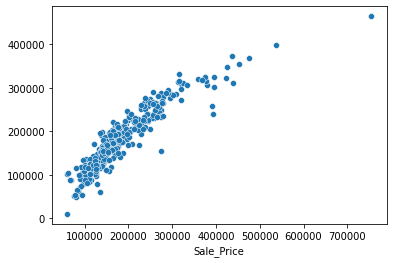

In [65]:
sns.scatterplot(ytest,ypred)

In [69]:
np.savetxt("ynew.csv", ypred, delimiter=",")

In [70]:
Ynew = pd.DataFrame(ynew_pred, columns=['Sale_Price'])

In [71]:
Ynew.head()

,Sale_Price
0,116075.238789
1,144095.700546
2,165297.966427
3,190597.858717
4,193891.863328


In [72]:
Report = pd.concat([file2,
                    Ynew.reindex(file2.index)],
                   axis=1)

In [73]:
Report.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,...,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1461,20,RHD,80.0,16104.819760,Paved,NaN,Reg,Lvl,AllPub,I,GS,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,SS,VinylSd,VinylSd,None,0.0,TA,TA,CB,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,TF,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,116075.238789
1,1462,20,RLD,81.0,15639.150810,Paved,NaN,IR1,Lvl,AllPub,C,GS,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,SS,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CB,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,TF,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,144095.700546
2,1463,60,RLD,74.0,3849.428920,Paved,NaN,IR1,Lvl,AllPub,I,GS,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,SS,VinylSd,VinylSd,None,0.0,TA,TA,PC,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,TF,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,165297.966427
3,1464,60,RLD,78.0,4955.447942,Paved,NaN,IR1,Lvl,AllPub,I,GS,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,SS,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PC,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,...,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,TF,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,190597.858717
4,1465,120,RLD,43.0,3046.604942,Paved,NaN,IR1,HLS,AllPub,I,GS,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,SS,HdBoard,HdBoard,None,0.0,Gd,TA,PC,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,...,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,TF,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,193891.863328


In [75]:
Report2 = pd.concat([Ynew,
                      file2.reindex(Ynew.index)],
                     axis=1)

In [76]:
Report2.head()

,Sale_Price,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,...,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
0,116075.238789,1461,20,RHD,80.0,16104.819760,Paved,NaN,Reg,Lvl,AllPub,I,GS,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,SS,VinylSd,VinylSd,None,0.0,TA,TA,CB,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,TF,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,144095.700546,1462,20,RLD,81.0,15639.150810,Paved,NaN,IR1,Lvl,AllPub,C,GS,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,SS,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CB,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,...,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,TF,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,165297.966427,1463,60,RLD,74.0,3849.428920,Paved,NaN,IR1,Lvl,AllPub,I,GS,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,SS,VinylSd,VinylSd,None,0.0,TA,TA,PC,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,...,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,TF,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,190597.858717,1464,60,RLD,78.0,4955.447942,Paved,NaN,IR1,Lvl,AllPub,I,GS,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,SS,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PC,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,...,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,TF,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,193891.863328,1465,120,RLD,43.0,3046.604942,Paved,NaN,IR1,HLS,AllPub,I,GS,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,SS,HdBoard,HdBoard,None,0.0,Gd,TA,PC,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,...,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,TF,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [77]:
Report2.to_csv('My Report.csv')